## Libraries

In [149]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

## Data Import and Cleaning/Formatting

In [122]:
# import data from excel
df = pd.read_csv("application_data (1).csv")

# remove rows with null values
df = df.dropna()
df = df.reset_index(drop=True)

display(df.head())

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,AGE
0,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,25.920548
1,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,Family,State servant,Higher education,Married,House / apartment,0.003541,45.931507
2,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,52.180822
3,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,52.068493
4,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,54.608219


In [190]:
# encode categorical variables into numbers - full label convention will be in final report
label_encoder = LabelEncoder()
df.NAME_CONTRACT_TYPE = label_encoder.fit_transform(df.NAME_CONTRACT_TYPE)
df.CODE_GENDER = label_encoder.fit_transform(df.CODE_GENDER)
df.FLAG_OWN_CAR = label_encoder.fit_transform(df.FLAG_OWN_CAR)
df.FLAG_OWN_REALTY = label_encoder.fit_transform(df.FLAG_OWN_REALTY)
df.NAME_TYPE_SUITE = label_encoder.fit_transform(df.NAME_TYPE_SUITE)
df.NAME_INCOME_TYPE = label_encoder.fit_transform(df.NAME_INCOME_TYPE)
df.NAME_EDUCATION_TYPE = label_encoder.fit_transform(df.NAME_EDUCATION_TYPE)
df.NAME_FAMILY_STATUS = label_encoder.fit_transform(df.NAME_FAMILY_STATUS)
df.NAME_HOUSING_TYPE = label_encoder.fit_transform(df.NAME_HOUSING_TYPE)

df.head()
# df.to_csv("app_data_encoded.csv")

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,AGE
0,1,0,1,0,1,0,202500.0,406597.5,24700.5,6,7,4,3,1,0.018801,25.920548
1,0,0,0,0,0,0,270000.0,1293502.5,35698.5,1,4,1,1,1,0.003541,45.931507
2,0,1,1,1,1,0,67500.0,135000.0,6750.0,6,7,4,3,1,0.010032,52.180822
3,0,0,0,0,1,0,135000.0,312682.5,29686.5,6,7,4,0,1,0.008019,52.068493
4,0,0,1,0,1,0,121500.0,513000.0,21865.5,6,7,4,3,1,0.028663,54.608219


In [114]:
scaler = MinMaxScaler()
numeric_scaled = scaler.fit_transform(df[["AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY", "NAME_TYPE_SUITE", \
    "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "NAME_FAMILY_STATUS", "NAME_HOUSING_TYPE","REGION_POPULATION_RELATIVE", "AGE"]]).T

df_scaled = df

df_scaled.AMT_INCOME_TOTAL = numeric_scaled[0]
df_scaled.AMT_CREDIT = numeric_scaled[1]
df_scaled.AMT_ANNUITY = numeric_scaled[2]
df_scaled.NAME_TYPE_SUITE = numeric_scaled[3]
df_scaled.NAME_INCOME_TYPE = numeric_scaled[4]
df_scaled.NAME_EDUCATION_TYPE = numeric_scaled[5]
df_scaled.NAME_FAMILY_STATUS = numeric_scaled[6]
df_scaled.NAME_HOUSING_TYPE = numeric_scaled[7]
df_scaled.REGION_POPULATION_RELATIVE = numeric_scaled[8]
df_scaled.AGE = numeric_scaled[9]

display(df_scaled.head())

# split into indp and dep vars
df_sample = df.sample(frac=.1)
X = df_sample.iloc[:, 1:]
y = df_sample.iloc[:, 0]

df_scaled_sample = df_scaled.sample(frac=.1)
X_scaled = df_scaled_sample.iloc[:, 1:]
y_scaled = df_scaled_sample.iloc[:, 0]

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,AGE
0,1,0,1,0,1,0,0.001512,0.090287,0.090032,1.000000,1.000000,1.00,0.75,0.2,0.256321,0.111161
1,0,0,0,0,0,0,0.002089,0.311736,0.132924,0.166667,0.571429,0.25,0.25,0.2,0.045016,0.522886
2,0,1,1,1,1,0,0.000358,0.022472,0.020025,1.000000,1.000000,1.00,0.75,0.2,0.134897,0.651466
3,0,0,0,0,1,0,0.000935,0.066837,0.109477,1.000000,1.000000,1.00,0.00,0.2,0.107023,0.649154
4,0,0,1,0,1,0,0.000819,0.116854,0.078975,1.000000,1.000000,1.00,0.75,0.2,0.392880,0.701409


## Exploratory Data Analysis

In [185]:
df_1 = df.loc[df["TARGET"] == 1]
df_0 = df.loc[df["TARGET"] == 0]

df_1.columns

Index(['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'AGE'],
      dtype='object')

In [195]:
# how much of target 
# sns.displot(df.TARGET, bins=3)
1 - sum(df.TARGET)/len(df.TARGET)

# arr = [8, 92]
# labels = ["Defaults", "Non-Defaults"]
# colors = sns.color_palette('pastel')[0:5]

# plt.pie(arr, labels = labels, colors = colors, autopct='%.0f%%')
# plt.show()

0.9191559957806321

<AxesSubplot:xlabel='AGE', ylabel='Count'>

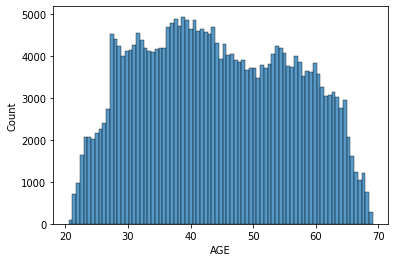

In [161]:
sns.histplot(df_0, x="AGE")


<AxesSubplot:xlabel='REGION_POPULATION_RELATIVE', ylabel='Count'>

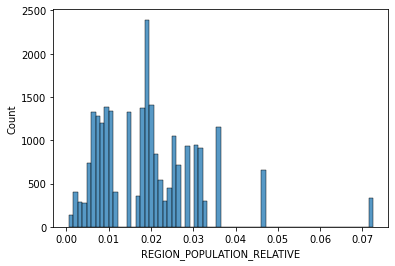

In [167]:
sns.histplot(df_1, x="REGION_POPULATION_RELATIVE")

<AxesSubplot:xlabel='AMT_INCOME_TOTAL', ylabel='Count'>

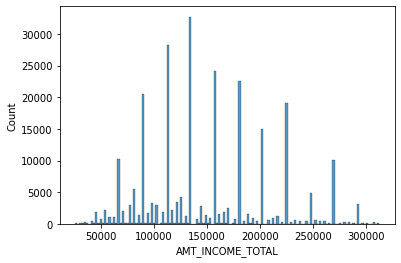

In [159]:
def reject_outliers(data, m=1.3):
    return data[abs(data - np.mean(data)) < m * np.std(data)]


# sns.histplot(reject_outliers(df_1.AMT_INCOME_TOTAL))
sns.histplot(reject_outliers(df_0.AMT_INCOME_TOTAL))

In [172]:
df_male = df.loc[df["CODE_GENDER"] == 1]
df_female = df.loc[df["CODE_GENDER"] == 0]

In [175]:
print("Male Default Rate: ", sum(df_male.TARGET)/len(df_male.TARGET))
print("Female Default Rate: ", sum(df_female.TARGET)/len(df_female.TARGET))

Male Default Rate:  0.10166590161426058
Female Default Rate:  0.07004736280903613


In [ ]:
print("Male Default Rate: ", sum(df_male.AMT_CREDIT)/len(df_male.TARGET))
print("Female Default Rate: ", sum(df_female.TARGET)/len(df_female.TARGET))

In [193]:
np.average(df_male.CNT_CHILDREN)
np.average(df_female.CNT_CHILDREN)

0.3923624370768964

In [208]:
print("ANNUITY PAYMENT/AVAILABLE CREDIT: ")
print("Male: ", np.average(df_female.AMT_ANNUITY/df_female.AMT_CREDIT))
print("Female: ", np.average(df_male.AMT_ANNUITY/df_male.AMT_CREDIT))

ANNUITY PAYMENT/AVAILABLE CREDIT: 
Male:  0.052568245751685505
Female:  0.05599976395069611


## Model training and R^2

In [52]:
# support vector classification
svc_model = SVC(gamma='auto')
svc_cv = cross_validate(svc_model, X_scaled, y_scaled, cv=3)
print("SVC: ", np.average(svc_cv["test_score"]))

SVC:  0.916527873028314


In [54]:
# random forest classification
rf_model = RandomForestClassifier(bootstrap=True)
rf_cv = cross_validate(rf_model, X, y, cv=3)
print("RF: ", np.average(rf_cv["test_score"]))

RF:  0.9211325560889586


In [55]:
# logistic regression
logit_model = LogisticRegression(max_iter=500)
logit_cv = cross_validate(logit_model, X, y, cv=3)
print("Logit: ", np.average(logit_cv["test_score"]))

Logit:  0.9211325560889586


In [56]:
# neural network 
nn_model = MLPClassifier(solver='adam', hidden_layer_sizes=(8))
nn_cv = cross_validate(nn_model, X_scaled, y_scaled, cv=3)
print("NN: ", np.average(nn_cv["test_score"]))

NN:  0.916527873028314


In [61]:
X_scaled_train, X_scaled_test, y_scaled_train, y_scaled_test = train_test_split(X_scaled, y_scaled, test_size=.2)

svc_model.fit(X_scaled_train, y_scaled_train)
y_pred = svc_model.predict(X_scaled_test)
y_pred

array([[5599,    0],
       [ 526,    0]], dtype=int64)

In [84]:
confusion_matrix(y_scaled_test, y_pred)

# for i in range(len(y_scaled_test)):
#     print(y_pred[i])

array([[5599,    0],
       [ 526,    0]], dtype=int64)